# Compression examples
In this notebook we compare constraints on cosmological parameters obtained with different types of compressions (shapefit, direct).
Notebooks fs_shapefit_examples.ipynb & fs_direct_examples.ipnyb must be run first to produce the samples needed in this notebook.

## BAO compression
As a warm-up, what constraints on $\Omega_m$ do we obtain from an isotropic BAO fit?

In [1]:
from desilike.samples import Chain
from desilike import setup_logging

setup_logging()
chain = Chain.load('_tests/chain_bao_0.npy').remove_burnin(0.3)
z = 1.

[000000.00] [0/1] 05-23 00:12  Chain                     INFO     Loading _tests/chain_bao_0.npy.


In [2]:
import numpy as np

from desilike.theories.primordial_cosmology import Cosmoprimo
from desilike.observables.galaxy_clustering import BAOCompressionObservable
from desilike.likelihoods import ObservablesGaussianLikelihood

quantities = ['qiso']
observable = BAOCompressionObservable(data=chain, covariance=chain, z=z, quantities=quantities, fiducial='DESI')
likelihood = ObservablesGaussianLikelihood(observables=[observable])

# Note that you can directly pass arrays as data and covariance, in addition to "quantities"
data = chain.choice(params=quantities, return_type='nparray')
covariance = chain.covariance(params=quantities, return_type='nparray')

observable = BAOCompressionObservable(data=data, covariance=covariance, quantities=quantities, z=z)
likelihood2 = ObservablesGaussianLikelihood(observables=[observable])
#assert np.allclose(likelihood2(Omega_m=0.29), likelihood(Omega_m=0.29))

In [3]:
# A bit of emulation, to speed up inference
from desilike.emulators import Emulator, TaylorEmulatorEngine
emulator = Emulator(observable, engine=TaylorEmulatorEngine(order=3))
emulator.set_samples()
emulator.fit()
likelihood.init.update(observables=[emulator.to_calculator()])

[000000.53] [0/1] 05-23 00:12  BAOCompressionObservable  INFO     Found quantities ['qiso'].
[000001.69] [0/1] 05-23 00:12  Emulator                  INFO     Varied parameters: ['Omega_m'].
[000001.69] [0/1] 05-23 00:12  Emulator                  INFO     Found varying ['flattheory'] and fixed ['flatdata', 'covariance', 'quantities'] outputs.
[000001.83] [0/1] 05-23 00:12  Differentiation           INFO     Varied parameters: ['Omega_m'].
[000008.36] [0/1] 05-23 00:12  Differentiation           INFO     Using finite-differentiation for parameter Omega_m.
[000008.37] [0/1] 05-23 00:12  Differentiation           INFO     Omega_m grid is [0.29519172 0.30519172 0.31519172 0.32519172 0.33519172].
[000008.37] [0/1] 05-23 00:12  Differentiation           INFO     Differentiation will evaluate 5 points.


In [4]:
from desilike.samplers import EmceeSampler

sampler = EmceeSampler(likelihood, seed=42)
sampler.run(check={'max_eigen_gr': 0.01})

[000009.05] [0/1] 05-23 00:12  EmceeSampler              INFO     Varied parameters: ['Omega_m'].
[000009.57] [0/1] 05-23 00:12  EmceeSampler              INFO     Successfully vmap input likelihood.
[000009.64] [0/1] 05-23 00:12  EmceeSampler              INFO     Successfully jit input likelihood.
[000009.74] [0/1] 05-23 00:12  TaskManager               INFO     Entering TaskManager with 1 workers.
[000011.43] [0/1] 05-23 00:12  EmceeSampler              INFO     Diagnostics:
[000011.44] [0/1] 05-23 00:12  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 0.142; not < 0.01.
[000011.44] [0/1] 05-23 00:12  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 0.142.
[000011.47] [0/1] 05-23 00:12  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.22.
[000011.47] [0/1] 05-23 00:12  Diagnostics               INFO     - max Geweke is 0.542.
[000011.47] [0/1] 05-23 00:12  Diagnostics               INFO     - Geweke p-value is nan.

[Chain(shape=(1800, 4), params=ParameterCollection(['Omega_m', 'logposterior', 'loglikelihood', 'logprior']))]

Removed no burn in


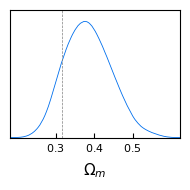

In [5]:
from desilike.samples import plotting
chain = sampler.chains[0].remove_burnin(0.4)
fiducial = observable.extractor.fiducial
plotting.plot_triangle(chain, markers={'Omega_m': fiducial.Omega0_m})

## ShapeFit compression
Now turn to shapefit compression.

In [6]:
from desilike.observables.galaxy_clustering import ShapeFitCompressionObservable

chain = Chain.load('_tests/chain_fs_shapefit_0.npy').remove_burnin(0.3)

quantities = ['qpar', 'qper', 'df', 'dm']
observable = ShapeFitCompressionObservable(data=chain, covariance=chain, z=z, quantities=quantities)
observable.all_params['omega_b'].update(fixed=True)

# A bit of emulation, to speed up inference
from desilike.emulators import Emulator, TaylorEmulatorEngine
emulator = Emulator(observable, engine=TaylorEmulatorEngine(order=3))
emulator.set_samples()
emulator.fit()
likelihood = ObservablesGaussianLikelihood(observables=[emulator.to_calculator()])

[000019.93] [0/1] 05-23 00:12  Chain                     INFO     Loading _tests/chain_fs_shapefit_0.npy.
[000020.07] [0/1] 05-23 00:12  ShapeFitCompressionObservable INFO     Found quantities ['qpar', 'qper', 'df', 'dm'].


/local/home/adematti/Bureau/DESI/NERSC/cosmodesi/cosmoprimo/cosmoprimo/eisenstein_hu.py:23: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


[000026.31] [0/1] 05-23 00:12  Emulator                  INFO     Varied parameters: ['h', 'Omega_m', 'logA'].
[000026.31] [0/1] 05-23 00:12  Emulator                  INFO     Found varying ['flattheory'] and fixed ['flatdata', 'covariance', 'quantities'] outputs.
[000027.25] [0/1] 05-23 00:12  Differentiation           INFO     Varied parameters: ['h', 'Omega_m', 'logA'].
[000033.81] [0/1] 05-23 00:12  Differentiation           INFO     Using finite-differentiation for parameter h.


/local/home/adematti/Bureau/DESI/NERSC/cosmodesi/cosmoprimo/cosmoprimo/eisenstein_hu.py:23: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


[000036.21] [0/1] 05-23 00:12  Differentiation           INFO     Using finite-differentiation for parameter Omega_m.


/local/home/adematti/Bureau/DESI/NERSC/cosmodesi/cosmoprimo/cosmoprimo/eisenstein_hu.py:23: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


[000038.59] [0/1] 05-23 00:12  Differentiation           INFO     Using finite-differentiation for parameter logA.
[000038.59] [0/1] 05-23 00:12  Differentiation           INFO     h grid is [0.6136 0.6436 0.6736 0.7036 0.7336].
[000038.59] [0/1] 05-23 00:12  Differentiation           INFO     Omega_m grid is [0.27519172 0.29519172 0.31519172 0.33519172 0.35519172].
[000038.59] [0/1] 05-23 00:12  Differentiation           INFO     logA grid is [2.93639426 2.98639426 3.03639426 3.08639426 3.13639426].
[000038.59] [0/1] 05-23 00:12  Differentiation           INFO     Differentiation will evaluate 33 points.


/local/home/adematti/Bureau/DESI/NERSC/cosmodesi/cosmoprimo/cosmoprimo/eisenstein_hu.py:23: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


In [7]:
from desilike.samplers import ZeusSampler

sampler = ZeusSampler(likelihood, seed=42)
sampler.run(check={'max_eigen_gr': 0.05})

[000070.39] [0/1] 05-23 00:13  ZeusSampler               INFO     Varied parameters: ['h', 'Omega_m', 'logA'].
[000071.00] [0/1] 05-23 00:13  ZeusSampler               INFO     Successfully vmap input likelihood.
[000071.09] [0/1] 05-23 00:13  ZeusSampler               INFO     Successfully jit input likelihood.
[000071.24] [0/1] 05-23 00:13  TaskManager               INFO     Entering TaskManager with 1 workers.
[000071.25] [0/1] 05-23 00:13  root                      INFO     Initialising ensemble of 8 walkers...
[000084.22] [0/1] 05-23 00:13  ZeusSampler               INFO     Diagnostics:
[000084.24] [0/1] 05-23 00:13  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 0.111; not < 0.05.
[000084.25] [0/1] 05-23 00:13  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 0.0159.
[000084.32] [0/1] 05-23 00:13  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.186.
[000084.33] [0/1] 05-23 00:13  Diagnostics               INF

/local/home/adematti/anaconda3/envs/cosmodesi-main/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)


[000095.47] [0/1] 05-23 00:13  ZeusSampler               INFO     Diagnostics:
[000095.49] [0/1] 05-23 00:13  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 0.0662; not < 0.05.
[000095.50] [0/1] 05-23 00:13  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 0.0126.
[000095.61] [0/1] 05-23 00:13  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.115.
[000095.62] [0/1] 05-23 00:13  Diagnostics               INFO     - max Geweke is 0.433.
[000095.62] [0/1] 05-23 00:13  Diagnostics               INFO     - Geweke p-value is 0.916.
[000095.64] [0/1] 05-23 00:13  Diagnostics               INFO     - effective sample size = (300 iterations / integrated autocorrelation time) (reliable) is 54.6.
[000095.64] [0/1] 05-23 00:13  Diagnostics               INFO     - max variation of integrated autocorrelation time is 0.268.
[000095.65] [0/1] 05-23 00:13  TaskManager               INFO     Entering TaskManager with 1 workers.
[0000

[Chain(shape=(1200, 8), params=ParameterCollection(['h', 'Omega_m', 'logA', 'logposterior', 'omega_b', 'n_s', 'tau_reio', 'm_ncdm', 'N_eff', 'w0_fld', 'wa_fld', 'Omega_k', 'loglikelihood', 'logprior']))]

[000118.55] [0/1] 05-23 00:13  Chain                     INFO     Loading _tests/chain_fs_direct_0.npy.
Removed no burn in
Removed no burn in


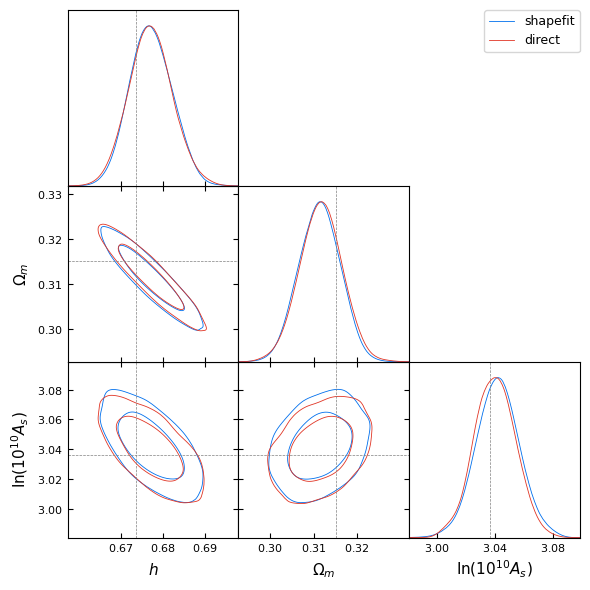

In [8]:
from desilike.samples import plotting
chain_shapefit = sampler.chains[0].remove_burnin(0.1)
chain_direct = Chain.load('_tests/chain_fs_direct_0.npy').remove_burnin(0.5)
plotting.plot_triangle([chain_shapefit, chain_direct], fill=True, labels=['shapefit', 'direct'], markers={'Omega_m': fiducial.Omega0_m, 'h': fiducial.h, 'logA': np.log(10**10 * fiducial.A_s), 'n_s': fiducial.n_s})